In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from datetime import datetime



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_excel(r'C:\Users\HP\Downloads\aspiring_minds_employability_outcomes_2015.xlsx')

In [3]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


## Data Cleaning

In [4]:
df.shape

(3998, 39)

In [5]:
col_drop = ['Unnamed: 0']
df.drop(col_drop, axis=1, inplace=True)

In [6]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['Dyear']= df['DOB'].dt.year
df.drop(columns=['DOB'],axis=1,inplace=True)


In [8]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12graduation,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Dyear
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1990
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,85.4,cbse,2007,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1989
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,85.0,cbse,2010,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1992
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,85.6,cbse,2007,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1989
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,78.0,cbse,2008,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1991


In [9]:
df.drop(columns=['CollegeID','CollegeCityID'],axis=1,inplace=True)


In [10]:
df['12board']=df['12board'].apply(lambda i: 'cbse'if i=='all india board' or i =='central board of secondary education, new delhi'or i == 'cbese'  or i== "cbse" else 'icse' if i=='isc'or i== 'icse'or i == 'isc board'or i=='isce'or i== 'cicse'or i =='isc board , new delhi'  else  'ssc')

In [11]:
df['10board']=df['10board'].apply(lambda i: 'cbse'if i=='all india board' or i =='central board of secondary education, new delhi'or i == 'cbese'  or i== "cbse" else 'icse' if i=='isc'or i== 'icse'or i == 'isc board'or i=='isce'or i== 'cicse'or i =='isc board , new delhi'  else  'ssc')

In [12]:
df['Designation'].value_counts().index.to_list()

['software engineer',
 'software developer',
 'system engineer',
 'programmer analyst',
 'systems engineer',
 'java software engineer',
 'software test engineer',
 'project engineer',
 'technical support engineer',
 'senior software engineer',
 'java developer',
 'test engineer',
 'web developer',
 'assistant manager',
 'application developer',
 'network engineer',
 'data analyst',
 'business analyst',
 'engineer',
 'associate software engineer',
 'android developer',
 'programmer',
 'senior systems engineer',
 '.net developer',
 'php developer',
 'qa analyst',
 'production engineer',
 'design engineer',
 'asp.net developer',
 'quality analyst',
 'electrical engineer',
 'assistant system engineer',
 'application engineer',
 'senior software developer',
 'system administrator',
 'lecturer',
 'management trainee',
 'senior engineer',
 'customer service representative',
 'sales executive',
 'software quality assurance tester',
 'quality engineer',
 'customer service',
 'software developme

In [13]:
df.Designation =df.Designation.apply(lambda k: "assistant software engineer" if k =='ase' else 'graduate engineer trainee' if k =='get' else 'cad engineer' if k =='gis/cad engineer' else 'website developer' if k =='website developer/tester' else 'software test engineer' if k =='software test engineer (etl)' else 'system engineer' if k =='systems engineer' else 'soft engineer' if k =='software eng' else k)

In [14]:
df.JobCity = df.JobCity.replace('ASIFABADBANGLORE','BANGALORE')
df.JobCity = df.JobCity.replace('NAVI MUMBAI','MUMBAI')
df.JobCity = df.JobCity.replace('GREATER NOIDA','NOIDA')
df.JobCity = df.JobCity.replace('KOCHI/COCHIN','KOCHI')
df.JobCity = df.JobCity.replace('GANDHI NAGAR','GANDHINAGAR')
df.JobCity = df.JobCity.replace('SECUNDERABAD','HYDERABAD')
df.JobCity = df.JobCity.replace('NASHIK','NASIKCITY')
df.JobCity = df.JobCity.replace('KOCHI/COCHIN, CHENNAI AND COIMBATORE','CHENNAI')
df.JobCity = df.JobCity.replace('LATUR (MAHARASHTRA )','MUMBAI')
df.JobCity = df.JobCity.replace('DELHI','NEW DELHI')
df.JobCity = df.JobCity.replace('BENGALURU','BANGALORE')
df.JobCity = df.JobCity.replace('BANGLORE','BANGALORE')
df.JobCity = df.JobCity.replace('BANAGALORE','BANGALORE')
df.JobCity = df.JobCity.replace('NEW DEHLI','NEW DELHI')
dfJobCity = df.JobCity.replace('HYDERABAD(BHADURPALLY)','HYDERABAD')
df.JobCity = df.JobCity.replace('HDERABAD','HYDERABAD')
df.JobCity = df.JobCity.replace('PUNR','PUNE') 
df.JobCity = df.JobCity.replace('A-64,SEC-64,NOIDA','NOIDA')
df.JobCity = df.JobCity.replace('NOUDA','NOIDA') 
df.JobCity = df.JobCity.replace('NEW DELHI - JAISALMER','NEW DELHI') 
df.JobCity = df.JobCity.replace('GAJIABAAD','GHAZIABAD') 
df.JobCity = df.JobCity.replace(' DELHI','NEW DELHI') 
df.JobCity = df.JobCity.replace(' DELHI','NEW DELHI') 
df.JobCity = df.JobCity.replace('INDIA','NEW DELHI') 
df.JobCity = df.JobCity.replace('AM','NAGPUR') 
df.JobCity = df.JobCity.replace('CHENNAI & MUMBAI','CHENNAI') 
df.JobCity = df.JobCity.replace('SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN','RAJASTHAN') 
df.JobCity = df.JobCity.replace('THANE','PUNE') 
df.JobCity = df.JobCity.replace('MUZAFFARNAGAR','LUCKNOW') 
df.JobCity = df.JobCity.replace('TIRUPATI','TIRUPATHI') 
df.JobCity = df.JobCity.replace('PONDI','PONDICHERRY') 
df.JobCity = df.JobCity.replace('NCR','NEW DELHI') 
df.JobCity = df.JobCity.replace('bbbb','NEW DELHI') 
df.JobCity = df.JobCity.replace('VSAKHAPTTNAM','VISAKHAPATNAM')
df.JobCity = df.JobCity.replace('NAVI MUMBAI , HYDERABAD','HYDERABAD')
df.JobCity = df.JobCity.replace('BANGALORE ','BANGALORE')
df.JobCity = df.JobCity.replace(' BANGALORE','BANGALORE')
df.JobCity = df.JobCity.replace('BANAGLORE','BANGALORE')
df.JobCity = df.JobCity.replace('CHENNAI, BANGALORE','BANGALORE')
df.JobCity = df.JobCity.replace('NEW DELHI ','NEW DELHI')
dfJobCity = df.JobCity.replace('HYDERABAD ','HYDERABAD')
df.JobCity = df.JobCity.replace('CHENNAI ','CHENNAI')
df.JobCity = df.JobCity.replace('GURGAON ','GURGAON')
df.JobCity = df.JobCity.replace('PUNE ','PUNE')
df.JobCity = df.JobCity.replace(' MUMBAI','MUMBAI')
df.JobCity = df.JobCity.replace('MUMBAI ','MUMBAI')
dfJobCity = df.JobCity.replace('NOIDA ','NOIDA')
df.JobCity = df.JobCity.replace('VIZAG','VISAKHAPATNAM')
df.JobCity = df.JobCity.replace('MYSORE ','MYSORE')
df.JobCity = df.JobCity.replace('NAGPUR ','NAGPUR')
df.JobCity = df.JobCity.replace('PANCHKULA ','PANCHUKLA')
df.JobCity = df.JobCity.replace(' PUNE','PUNE')
df.JobCity = df.JobCity.replace('DAMAN AND DIU','LUCKNOW')
df.JobCity = df.JobCity.replace(' ARIYALUR','LUCKNOW')
df.JobCity = df.JobCity.replace('TECHNOPARK, TRIVANDRUM','TRIVANDRUM')
df.JobCity = df.JobCity.replace('KANPUR ','KANPUR')
df.JobCity = df.JobCity.replace('RAYAGADA, ODISHA','DEHRADUN')
df.JobCity = df.JobCity.replace('TRIVANDRUM ','TRIVANDRUM')
df.JobCity = df.JobCity.replace('INDIRAPURAM, GHAZIABAD','GHAZIABAD')
df.JobCity = df.JobCity.replace('AHMEDABAD ','AHMEDABAD')
dfJobCity = df.JobCity.replace('SILIGURI','KOLKATA')
df.JobCity = df.JobCity.replace('SILIGURI ','KOLKATA')
df.JobCity = df.JobCity.replace('KOLKATA`','KOLKATA')
df.JobCity = df.JobCity.replace('RAS AL KHAIMAH','DUBAI')
df.JobCity = df.JobCity.replace('MADURAI','CHENNAI')
df.JobCity = df.JobCity.replace('MADURAI ','CHENNAI')
df.JobCity = df.JobCity.replace(' CHENNAI','CHENNAI')
df.JobCity = df.JobCity.replace('AMBALA CITY','CHANDIGARH')
df.JobCity = df.JobCity.replace('JAIPUR ','JAIPUR')
df.JobCity = df.JobCity.replace('AL JUBAIL,SAUDI ARABIA','DUBAI')
dfJobCity = df.JobCity.replace('KUDANKULAM ,TARAPUR','MUMBAI') 
df.JobCity = df.JobCity.replace('CHANDIGARH ','CHANDIGARH')
df.JobCity = df.JobCity.replace('KERAL','TRIVANDRUM')
df.JobCity = df.JobCity.replace('BANGLORE ','BANGALORE')
df.JobCity = df.JobCity.replace('GANDHINAGAR ','GANDHINAGAR')
df.JobCity = df.JobCity.replace('BHOPAL ','BHOPAL')
df.JobCity = df.JobCity.replace('LUCKNOW ','LUCKNOW')
df.JobCity = df.JobCity.replace('METTUR, TAMIL NADU ','CHENNAI')
df.JobCity = df.JobCity.replace('KOLKATA ','KOLKATA')
df.JobCity = df.JobCity.replace('KALA AMB ','SHIMLA')
df.JobCity = df.JobCity.replace('UNA','SHIMLA')
df.JobCity = df.JobCity.replace('PONDY','PONDICHERRY')
df.JobCity = df.JobCity.replace('RANCHI ','RANCHI')
df.JobCity = df.JobCity.replace('KALMAR, SWEDEN','SWEDEN')
df.JobCity = df.JobCity.replace('JEDDAH SAUDI ARABIA','DUBAI')

In [15]:
df.JobCity.value_counts()

Bangalore            627
-1                   461
Noida                368
Hyderabad            335
Pune                 290
                    ... 
kakinada               1
Bhagalpur              1
Asifabadbanglore       1
A-64,sec-64,noida      1
chandigarh             1
Name: JobCity, Length: 333, dtype: int64

In [16]:
df.drop(columns=['conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'],axis=1,inplace=True)


In [17]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Dyear'],
      dtype='object')

## Univariate

<AxesSubplot:>

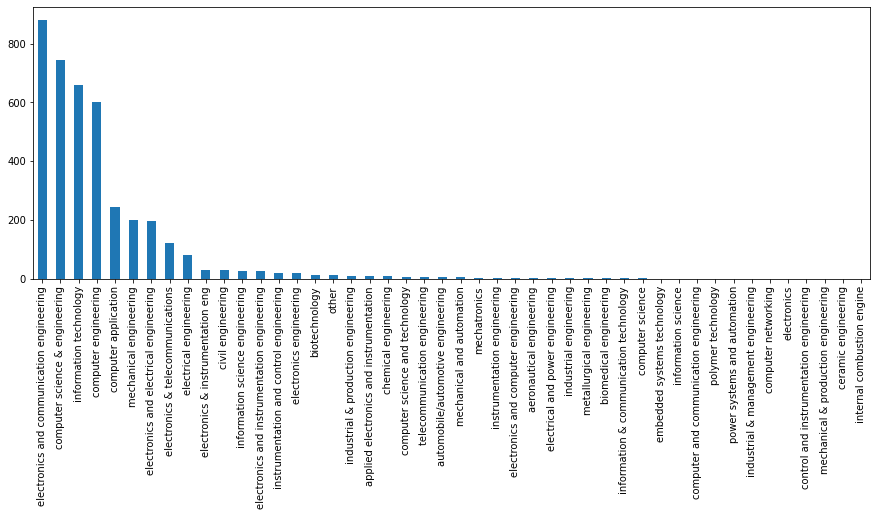

In [18]:
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))

In [19]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

<AxesSubplot:>

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


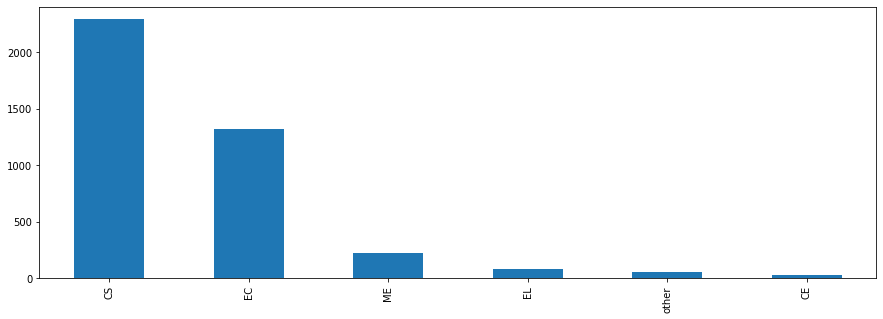

In [20]:
df['Specialization'] = df['Specialization'].map(specialization_map)

df['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

print(df['Specialization'].unique())

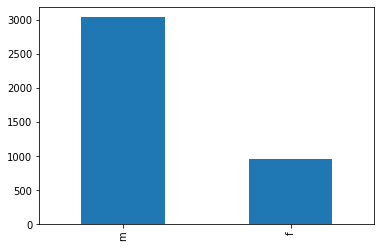

In [21]:
df['Gender'].value_counts().plot(kind = 'bar');

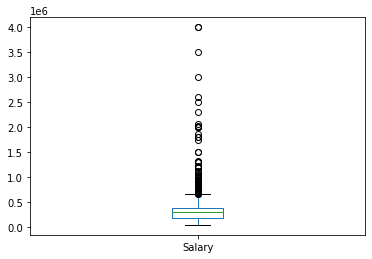

In [22]:
df.Salary.plot(kind='box'); 

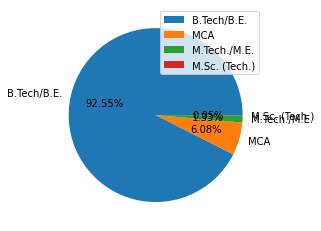

In [23]:
plt.pie(x = df['Degree'].value_counts().values,
       labels =df['Degree'].value_counts().index,
       autopct='%.2f%%')
plt.legend();    

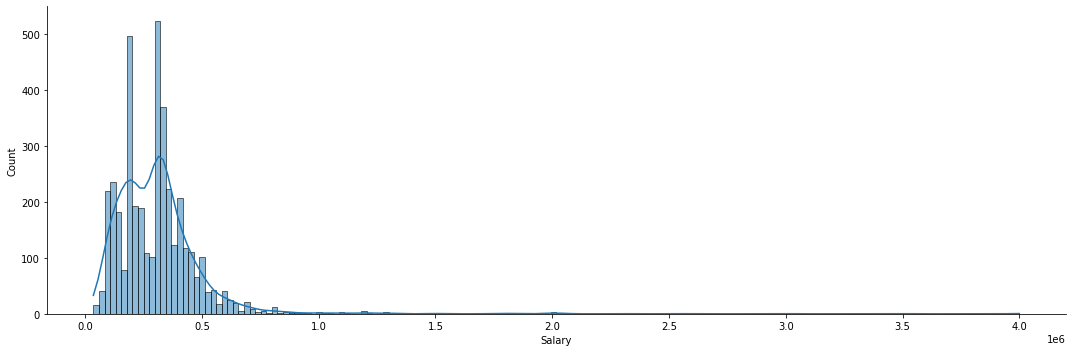

In [24]:
sns.displot(data = df, x = 'Salary',height=5, aspect = 30/10,kde = True);

(array([3.398e+03, 5.500e+02, 2.700e+01, 6.000e+00, 8.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([  35000.,  431500.,  828000., 1224500., 1621000., 2017500.,
        2414000., 2810500., 3207000., 3603500., 4000000.]),
 <BarContainer object of 10 artists>)

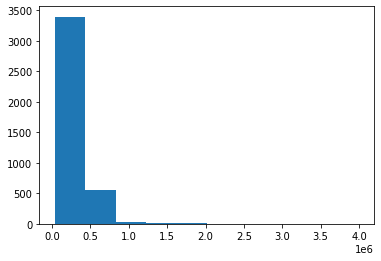

In [25]:
plt.hist(df['Salary'],bins=10)

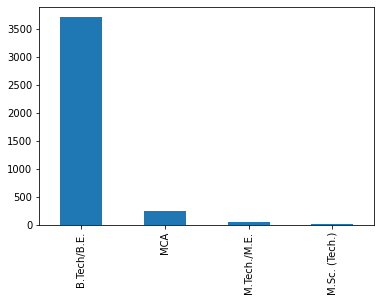

In [26]:
df['Degree'].value_counts().plot(kind = 'bar');

## Bivariate

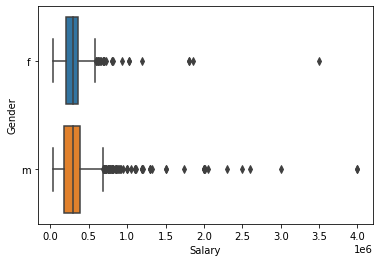

In [27]:
sns.boxplot(data= df, x = 'Salary',y='Gender');

<AxesSubplot:xlabel='10board'>

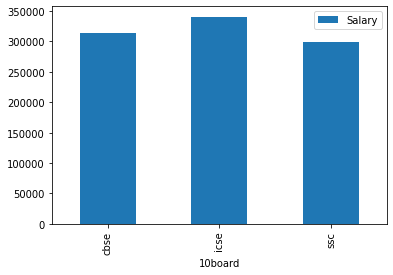

In [28]:
pd.pivot_table(data = df,values='Salary', index = '10board').plot(kind='bar')

<AxesSubplot:xlabel='12board'>

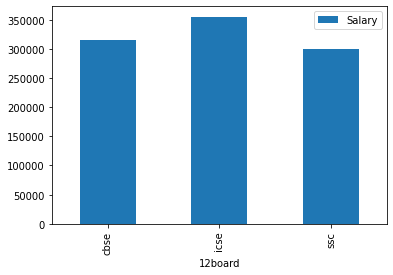

In [29]:
pd.pivot_table(data = df,values='Salary', index = '12board').plot(kind='bar')

(array([3.398e+03, 5.500e+02, 2.700e+01, 6.000e+00, 8.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([  35000.,  431500.,  828000., 1224500., 1621000., 2017500.,
        2414000., 2810500., 3207000., 3603500., 4000000.]),
 <BarContainer object of 10 artists>)

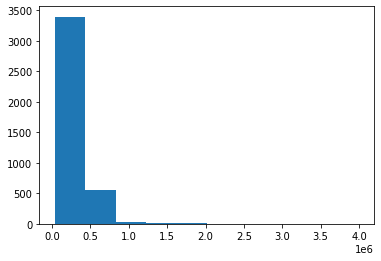

In [30]:
plt.hist(df['Salary'],bins=10)

Bringing the CGPA to a 0-100 scale


<AxesSubplot:ylabel='Frequency'>

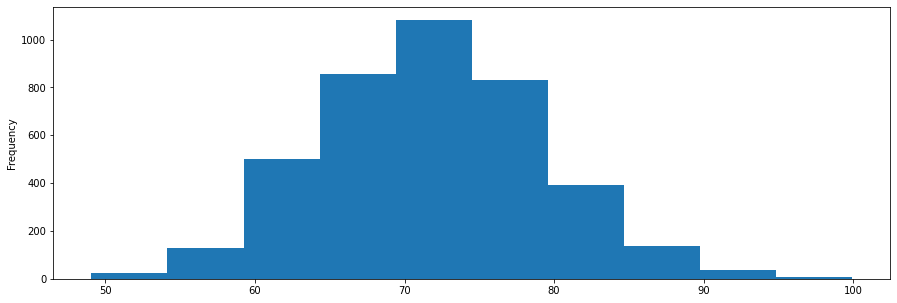

In [31]:
# Histogram Plot

print('Bringing the CGPA to a 0-100 scale')

df.loc[df['collegeGPA'] <= 10, 'collegeGPA'] *= 10
df['collegeGPA'].plot(kind='hist', figsize=(15,5))

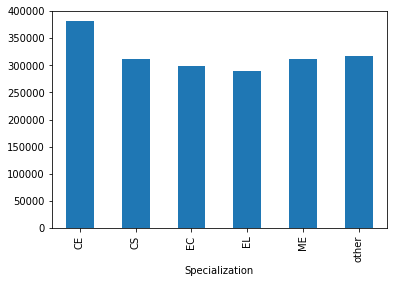

In [32]:
df.groupby(['Specialization'])['Salary'].mean().plot(kind = 'bar');

In [33]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'system engineer',
       'senior software engineer', 'graduate engineer trainee',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst',
       'assistant software engineer', 'telecommunication engineer',
       'application developer', 'ios developer', 'executive assistant',
       'online marketing manager', 'documentation specialist',
       'associate software engineer', 'management trainee',
       'site manager', 'software developer', '.net developer',
       'production engineer', 'jr. software engineer',
       'trainee software develop

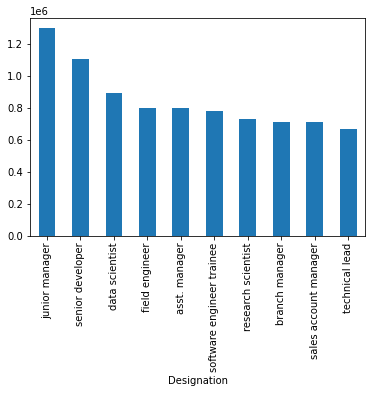

In [34]:
df.groupby(['Designation'])['Salary'].mean().nlargest(10).plot(kind = 'bar');

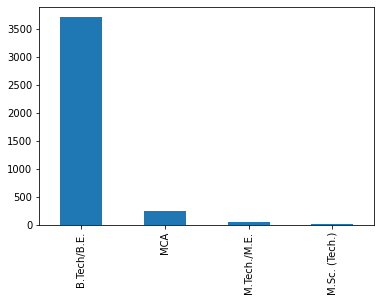

In [35]:
df['Degree'].value_counts().plot(kind = 'bar');

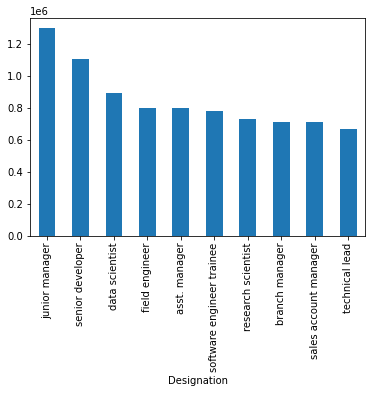

In [36]:
df.groupby(['Designation'])['Salary'].mean().nlargest(10).plot(kind = 'bar');

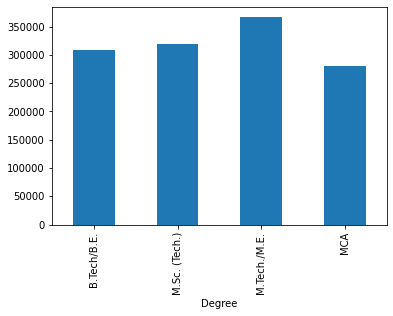

In [37]:
df.groupby(['Degree'])['Salary'].mean().plot(kind = 'bar');

## Multi-variate


<AxesSubplot:>

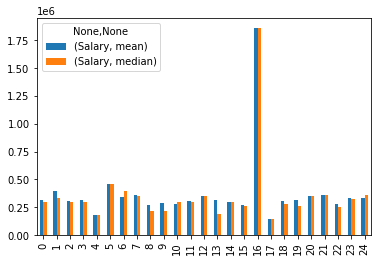

In [38]:
df.groupby(['Specialization','Degree',
                'Gender'],
              as_index=False).agg({'Salary': ['mean'
                                                    ,'median']}).plot(kind = 'bar')

In [39]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Dyear'],
      dtype='object')

In [40]:
df.corr()

,ID,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Dyear
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.035160,0.044828,-0.035977,0.027539,0.135505,...,-0.055134,-0.125639,0.018859,-0.115601,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.628784
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.179332,0.148318,0.015384,-0.010053,0.178219,...,0.230627,0.104656,0.115665,0.000665,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.151714
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,-0.126042,0.340729,0.116707,-0.013799,0.350780,...,0.317640,0.078563,0.053600,0.085179,-0.018933,0.050364,0.074419,0.049378,0.030002,0.243880
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.027691,0.092672,-0.003016,0.014457,0.147925,...,0.001379,-0.034163,-0.047995,-0.005891,0.293439,0.035459,0.123751,0.023470,-0.004727,0.872401
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,-0.100771,0.388457,0.130462,-0.012933,0.212888,...,0.312413,0.074099,0.080818,0.117112,-0.043534,0.037635,0.064001,0.044201,0.005910,0.265781
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,1.000000,-0.107928,-0.101494,-0.005557,-0.183843,...,-0.251103,-0.061436,-0.073644,-0.031573,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.043154
collegeGPA,0.044828,0.148318,0.340729,0.092672,0.388457,-0.107928,1.000000,0.010888,0.010696,0.111532,...,0.243110,0.123231,0.139148,0.030285,0.001325,0.002369,0.051978,-0.006756,-0.006273,0.119087
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,-0.101494,0.010888,1.000000,0.008152,0.050462,...,0.007896,0.009250,0.064272,0.041083,-0.010643,-0.052395,0.010311,0.049876,-0.033392,-0.035623
GraduationYear,0.027539,-0.010053,-0.013799,0.014457,-0.012933,-0.005557,0.010696,0.008152,1.000000,-0.024089,...,-0.021781,-0.009741,0.026688,0.006179,0.024089,-0.066844,0.008525,0.004226,0.001696,0.025639
English,0.135505,0.178219,0.350780,0.147925,0.212888,-0.183843,0.111532,0.050462,-0.024089,1.000000,...,0.375784,0.089721,0.125005,0.018591,0.059500,-0.002477,0.032438,-0.005822,-0.007724,0.101117


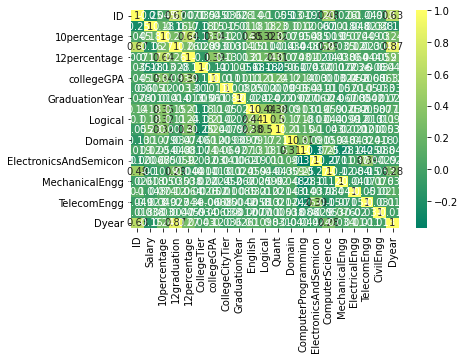

In [41]:
sns.heatmap(df.corr(),cmap= 'summer', annot= True);